In [1]:
%matplotlib inline


# Label Propagation digits: Demonstrating performance

This example demonstrates the power of semisupervised learning by
training a Label Spreading model to classify handwritten digits
with sets of very few labels.

The handwritten digit dataset has 1797 total points. The model will
be trained using all points, but only 30 will be labeled. Results
in the form of a confusion matrix and a series of metrics over each
class will be very good.

At the end, the top 10 most uncertain predictions will be shown.


## Data generation

We use the digits dataset. We only use a subset of randomly selected samples.



In [3]:
from sklearn import datasets
import numpy as np

digits = datasets.load_digits()
rng = np.random.RandomState(2)
indices = np.arange(len(digits.data))
rng.shuffle(indices)

We selected 340 samples of which only 40 will be associated with a known label.
Therefore, we store the indices of the 300 other samples for which we are not
supposed to know their labels.



In [4]:
X = digits.data[indices[:340]]
y = digits.target[indices[:340]]
images = digits.images[indices[:340]]

n_total_samples = len(y)
n_labeled_points = 40

indices = np.arange(n_total_samples)

unlabeled_set = indices[n_labeled_points:]

Shuffle everything around



In [5]:
y_train = np.copy(y)
y_train[unlabeled_set] = -1

## Semi-supervised learning

We fit a :class:`~sklearn.semi_supervised.LabelSpreading` and use it to predict
the unknown labels.



In [6]:
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import classification_report

lp_model = LabelSpreading(gamma=0.25, max_iter=20)
lp_model.fit(X, y_train)
predicted_labels = lp_model.transduction_[unlabeled_set]
true_labels = y[unlabeled_set]

print(
    "Label Spreading model: %d labeled & %d unlabeled points (%d total)"
    % (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples)
)

Label Spreading model: 40 labeled & 300 unlabeled points (340 total)


Classification report



In [7]:
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.82      1.00      0.90        37
           2       1.00      0.86      0.92        28
           3       1.00      0.80      0.89        35
           4       0.92      1.00      0.96        24
           5       0.74      0.94      0.83        34
           6       0.89      0.96      0.92        25
           7       0.94      0.89      0.91        35
           8       1.00      0.68      0.81        31
           9       0.81      0.88      0.84        24

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300



Confusion matrix



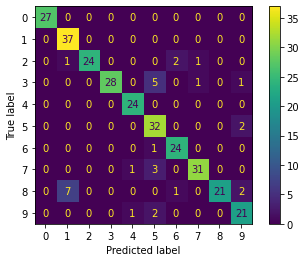

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    true_labels, predicted_labels, labels=lp_model.classes_
)

## Plot the most uncertain predictions

Here, we will pick and show the 10 most uncertain predictions.



In [9]:
from scipy import stats

pred_entropies = stats.distributions.entropy(lp_model.label_distributions_.T)

Pick the top 10 most uncertain labels



In [10]:
uncertainty_index = np.argsort(pred_entropies)[-10:]

Plot



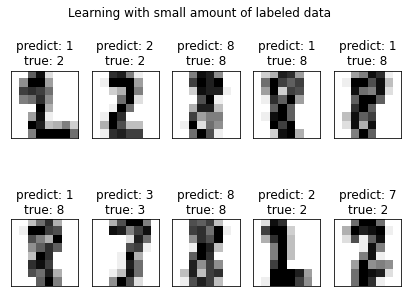

In [11]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(7, 5))
for index, image_index in enumerate(uncertainty_index):
    image = images[image_index]

    sub = f.add_subplot(2, 5, index + 1)
    sub.imshow(image, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    sub.set_title(
        "predict: %i\ntrue: %i" % (lp_model.transduction_[image_index], y[image_index])
    )

f.suptitle("Learning with small amount of labeled data")
plt.show()